In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastai.vision.all import *
from fastbook import *

In [67]:
from ipywidgets import interact

In [3]:
matplotlib.rc('image', cmap='Greys')

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)
path

Path('/home/abhilash/.fastai/data/mnist_sample')

In [5]:
path.ls()

(#3) [Path('/home/abhilash/.fastai/data/mnist_sample/labels.csv'),Path('/home/abhilash/.fastai/data/mnist_sample/valid'),Path('/home/abhilash/.fastai/data/mnist_sample/train')]

In [6]:
(path/'train').ls()

(#2) [Path('/home/abhilash/.fastai/data/mnist_sample/train/7'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3')]

In [7]:
(path/'train/3').ls()

(#6131) [Path('/home/abhilash/.fastai/data/mnist_sample/train/3/47123.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/21559.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/17103.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/59660.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/59408.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/20738.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/8195.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/15109.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/54568.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/21075.png')...]

In [8]:
(path/'train/7').ls()

(#6265) [Path('/home/abhilash/.fastai/data/mnist_sample/train/7/7420.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/9878.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/47453.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/18966.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/27005.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/31957.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/14379.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/5811.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/33104.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/43686.png')...]

In [9]:
three_paths = (path/'train/3').ls().sorted()
three_paths

(#6131) [Path('/home/abhilash/.fastai/data/mnist_sample/train/3/10.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/10000.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/10011.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/10031.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/10034.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/10042.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/10052.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/1007.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/10074.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/3/10091.png')...]

In [10]:
a_3 = Image.open(three_paths[1])
a_3

<AxesSubplot: >

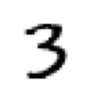

In [11]:
show_image(a_3)

In [12]:
tensor(a_3)[4:8,4:8]

tensor([[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,  48],
        [  0,  93, 244, 249]], dtype=torch.uint8)

In [13]:
seven_paths = (path/'train/7').ls().sorted()
seven_paths

(#6265) [Path('/home/abhilash/.fastai/data/mnist_sample/train/7/10002.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/1001.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/10014.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/10019.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/10039.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/10046.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/10050.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/10063.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/10077.png'),Path('/home/abhilash/.fastai/data/mnist_sample/train/7/10086.png')...]

In [14]:
a_7 = Image.open(seven_paths[1])
a_7

<AxesSubplot: >

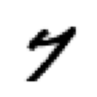

In [15]:
show_image(a_7)

In [16]:
three_tensors = [tensor(Image.open(o)) for o in three_paths]
len(three_tensors)

6131

<AxesSubplot: >

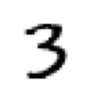

In [17]:
show_image(three_tensors[1])

In [18]:
seven_tensors = [tensor(Image.open(o)) for o in seven_paths]
len(seven_tensors)

6265

<AxesSubplot: >

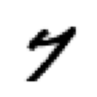

In [19]:
show_image(seven_tensors[1])

In [20]:
three_tensors[1].shape, seven_tensors[1].shape

(torch.Size([28, 28]), torch.Size([28, 28]))

In [21]:
threes_stacked = torch.stack(three_tensors).float() / 255
threes_stacked.shape

torch.Size([6131, 28, 28])

In [22]:
sevens_stacked = torch.stack(seven_tensors).float() / 255
sevens_stacked.shape

torch.Size([6265, 28, 28])

<AxesSubplot: >

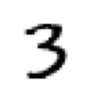

In [23]:
show_image(threes_stacked[1])

<AxesSubplot: >

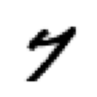

In [24]:
show_image(sevens_stacked[1])

In [25]:
threes_mean = threes_stacked.mean(0)
threes_mean.shape

torch.Size([28, 28])

<AxesSubplot: >

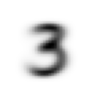

In [26]:
show_image(threes_mean)

In [27]:
sevens_mean = sevens_stacked.mean(0)
sevens_mean.shape

torch.Size([28, 28])

<AxesSubplot: >

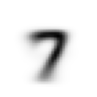

In [28]:
show_image(sevens_mean)

In [29]:
def show_diff_image(tnr, mean_tnr):
    diff = tnr - mean_tnr
    diff[diff < 0] = 0
    
    _, axs = plt.subplots(1,3, figsize=(4,1))
    show_image(tnr, axs[0])
    show_image(mean_tnr, axs[1])
    show_image(diff, axs[2])

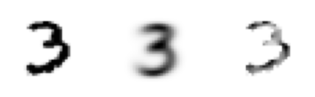

In [30]:
show_diff_image(threes_stacked[4], threes_mean)

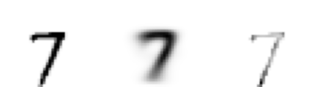

In [31]:
show_diff_image(sevens_stacked[5], sevens_mean)

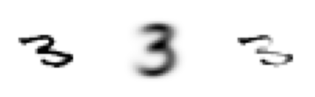

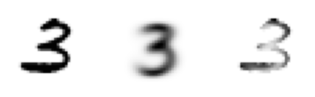

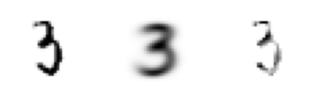

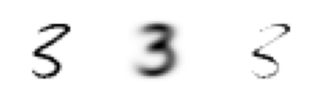

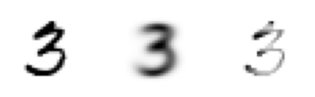

In [32]:
for i in range(80,85): show_diff_image(threes_stacked[i], threes_mean)

In [33]:
a_3_tensor = threes_stacked[1]
a_7_tensor = sevens_stacked[1]

In [34]:
dist_3_abs = (a_3_tensor - threes_mean).abs().mean()
dist_3_sqr = ((a_3_tensor - threes_mean) ** 2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [35]:
dist_7_abs = (a_3_tensor - sevens_mean).abs().mean()
dist_7_sqr = ((a_3_tensor - sevens_mean) ** 2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [36]:
F.l1_loss(a_3_tensor, threes_mean), F.mse_loss(a_3_tensor, threes_mean).sqrt()

(tensor(0.1114), tensor(0.2021))

In [37]:
F.l1_loss(a_3_tensor, sevens_mean), F.mse_loss(a_3_tensor, sevens_mean).sqrt()

(tensor(0.1586), tensor(0.3021))

In [38]:
a_3_tensor.type(), a_3_tensor.dtype

('torch.FloatTensor', torch.float32)

### Trying out tensors

In [39]:
data = tensor([[1,2,3], [4,5,6]])
data

tensor([[1, 2, 3],
        [4, 5, 6]])

In [40]:
data.shape, data.dtype

(torch.Size([2, 3]), torch.int64)

In [41]:
data[0], data[0].shape

(tensor([1, 2, 3]), torch.Size([3]))

In [42]:
data[:,0], data[:,0].shape

(tensor([1, 4]), torch.Size([2]))

In [43]:
data[1,1:3], data[1,1:3].shape

(tensor([5, 6]), torch.Size([2]))

In [44]:
data.float().mean(0), data.float().mean()

(tensor([2.5000, 3.5000, 4.5000]), tensor(3.5000))

In [45]:
data = data.float()
data

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [46]:
data = torch.arange(24).reshape(2,3,4).float()
data

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])

In [47]:
data.size(0), data.size(1), data.size(2)

(2, 3, 4)

In [48]:
data.mean(0), data.mean(0).shape, 

(tensor([[ 6.,  7.,  8.,  9.],
         [10., 11., 12., 13.],
         [14., 15., 16., 17.]]),
 torch.Size([3, 4]))

In [49]:
data[0][1][3]

tensor(7.)

In [50]:
data.mean(1), data.mean(1).shape,

(tensor([[ 4.,  5.,  6.,  7.],
         [16., 17., 18., 19.]]),
 torch.Size([2, 4]))

In [51]:
data.mean((0,1)), data.mean((0,1)).shape,

(tensor([10., 11., 12., 13.]), torch.Size([4]))

In [52]:
valid_3_stack = torch.stack([tensor(Image.open(o)) for o in (path/'valid/3').ls().sorted()])
valid_3_stack.shape

torch.Size([1010, 28, 28])

In [53]:
valid_7_stack = torch.stack([tensor(Image.open(o)) for o in (path/'valid/7').ls().sorted()])
valid_7_stack.shape

torch.Size([1028, 28, 28])

In [54]:
def mnist_distance(a, b): return (a - b).abs().mean((-1,-2))

In [55]:
mnist_distance(a_3_tensor, threes_mean)

tensor(0.1114)

In [56]:
mnist_distance(valid_3_stack, threes_mean)

tensor([25.6367, 44.4859, 41.5864,  ..., 27.7280, 41.1506, 43.8371])

In [57]:
mnist_distance(valid_3_stack, sevens_mean)

tensor([25.6681, 44.5278, 41.6196,  ..., 27.7274, 41.1643, 43.8784])

In [58]:
def is_3(x): return mnist_distance(x, threes_mean) < mnist_distance(x, sevens_mean)

In [59]:
is_3(a_3_tensor)

tensor(True)

In [60]:
is_3(valid_3_stack)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [61]:
is_3(valid_3_stack).float()

tensor([1., 1., 1.,  ..., 0., 1., 1.])

In [62]:
accuracy_3s = is_3(valid_3_stack).float().mean()
accuracy_3s

tensor(0.9436)

In [63]:
accuracy_7s = 1 - is_3(valid_7_stack).float().mean()
accuracy_7s

tensor(0.9815)

#### SGD

In [78]:
def plot_f(f, x_rng=(-10,10), npoints=100):
    x1, x2 = x_rng
    x = torch.linspace(x1, x2, npoints)
    y = f(x)
    plt.plot(x, y)

In [80]:
def quad(a, b, c, x):
    return a*(x**2) + b*x + c

In [81]:
def mk_quad(a, b, c):
    return partial(quad, a, b, c)

In [86]:
@interact(a=(1,5,1),b=(1,5,1),c=(1,10,1))
def plot_quad(a,b,c):
    plot_f(mk_quad(a, b, c))

interactive(children=(IntSlider(value=3, description='a', max=5, min=1), IntSlider(value=3, description='b', m…

In [196]:
x = torch.linspace(-10, 10, 20).float()

In [197]:
my_quad = mk_quad(2, 4, 10)

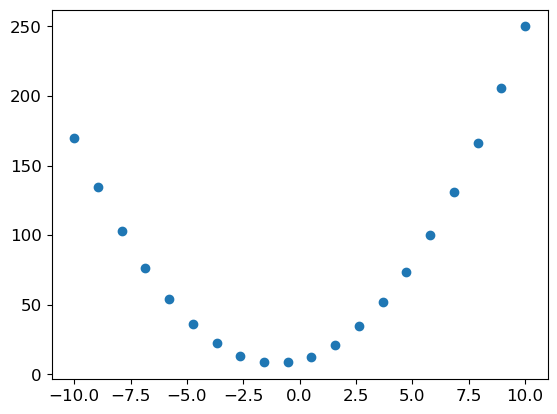

In [198]:
plt.scatter(x, my_quad(x))

In [199]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

In [212]:
y = add_noise(my_quad(x), 0.14, 3.5).float()

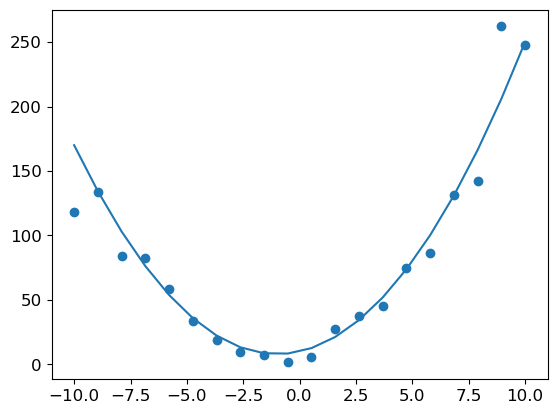

In [201]:
plt.plot(x, my_quad(x))
plt.scatter(x, y)

In [276]:
def quad_pred(params, x):
    a, b, c = params
    return a*(x ** 2) + b*x + c

In [369]:
params = torch.randn(3)
params.requires_grad_()

tensor([-0.1307,  0.9796,  0.5960], requires_grad=True)

In [371]:
lr = 1e-4
def do_step(params, prn=True):
    preds = quad_pred(params, x)
    loss = F.mse_loss(preds, y).sqrt()
    loss.backward()
    with torch.no_grad(): 
        params -= lr* params.grad
    params.grad = None
    if prn: print(loss.item())
    return loss.item()

In [372]:
epoches, losses = zip(*[(i, do_step(params, False)) for i in range(10000)])

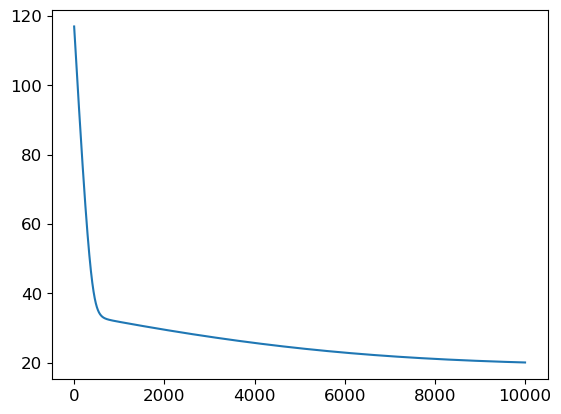

In [373]:
plt.plot(epoches, losses)

tensor([2.1375, 4.5050, 0.7169])


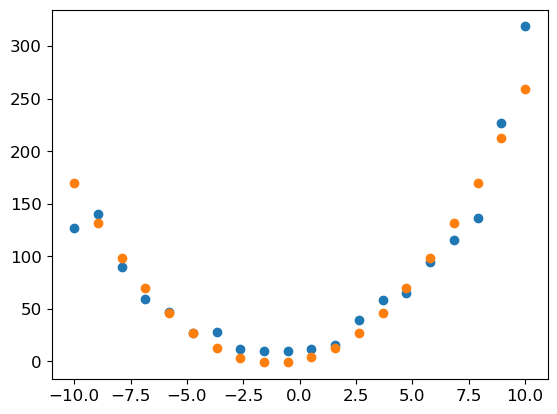

In [374]:
plt.scatter(x, y)
preds = quad_pred(params, x)
plt.scatter(x, preds.detach())
print(params.data)

In [339]:
foo = torch.randn(3); foo

tensor([-0.5359,  0.3355,  0.2469])

In [340]:
foo.requires_grad = True

In [344]:
goo = foo[0]**2 + 3*foo[1] + foo[2]; goo

tensor(1.5407, grad_fn=<AddBackward0>)

In [345]:
goo.backward()

In [346]:
foo.grad

tensor([-2.1438,  6.0000,  2.0000])

#### Resuming NN stuff

In [376]:
threes_stacked.shape, sevens_stacked.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [381]:
torch.cat([threes_stacked, sevens_stacked]).view(-1, 28*28).shape

torch.Size([12396, 784])

In [397]:
foo = tensor([1]*len(three_paths) + [0]*len(seven_paths)); foo

tensor([1, 1, 1,  ..., 0, 0, 0])

In [398]:
foo_1 = foo.unsqueeze(1); foo_1.shape

torch.Size([12396, 1])

In [401]:
foo_view = foo.view(foo.shape); foo_view

tensor([1, 1, 1,  ..., 0, 0, 0])

In [403]:
foo_view.data_ptr() == foo.data_ptr()

True

In [404]:
foo.data_ptr() == foo_1.data_ptr()

True